# Covid-19 Vaccine Tracker

Dataset link: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

#### Copied below information from kaggle(above link)

#### Context
Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded.

#### Content
The data (country vaccinations) contains the following information:

**Country -**  this is the country for which the vaccination information is provided; <br>
**Country ISO Code -** ISO code for the country;<br>
**Date -** date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total; <br>
**Total number of vaccinations -** this is the absolute number of total immunizations in the country; <br>
**Total number of people vaccinated -** a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people; <br>
**Total number of people fully vaccinated -** this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme; <br>
**Daily vaccinations (raw) -** for a certain data entry, the number of vaccination for that date/country; <br>
**Daily vaccinations -** for a certain data entry, the number of vaccination for that date/country; <br>
**Total vaccinations per hundred -** ratio (in percent) between vaccination number and total population up to the date in the country; <br>
**Total number of people vaccinated per hundred -** ratio (in percent) between population immunized and total population up to the date in the country; <br>
**Total number of people fully vaccinated per hundred -** ratio (in percent) between population fully immunized and total population up to the date in the country; <br>
**Number of vaccinations per day -** number of daily vaccination for that day and country; <br>
**Daily vaccinations per million -** ratio (in ppm) between vaccination number and total population for the current date in the country; <br>
**Vaccines used in the country -** total number of vaccines used in the country (up to date); <br>
**Source name -** source of the information (national authority, international organization, local organization etc.); <br>
**Source website -** website of the source of information; <br>
 <br> <br>
There is a second file added recently (country vaccinations by manufacturer), with the following columns: <br>
**Location -** country; <br>
**Date -** date; <br>
**Vaccine -** vaccine type; <br>
**Total number of vaccinations -** total number of vaccinations / current time and vaccine type. <br>
 <br>
**Inspiration** <br>
Track COVID-19 vaccination in the World, answer instantly to your questions: <br>
 <br>
1) Which country is using what vaccine? <br>
2) In which country the vaccination programme is more advanced? <br>
3) Where are vaccinated more people per day? But in terms of percent from entire population ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import warnings

In [2]:
vaccine_master_data = pd.read_csv('country_vaccinations.csv')

In [3]:
#List of columns
vaccine_master_data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [4]:
vaccine_master_data.shape

(20390, 15)

We have total 15 columns and 20390 rows

In [5]:
vaccine_master_data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      8772
people_vaccinated                       9531
people_fully_vaccinated                12004
daily_vaccinations_raw                 10719
daily_vaccinations                       214
total_vaccinations_per_hundred          8772
people_vaccinated_per_hundred           9531
people_fully_vaccinated_per_hundred    12004
daily_vaccinations_per_million           214
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
#List how many country present in dataset
vaccine_master_data.groupby('country').size()

country
Afghanistan           92
Albania              135
Algeria               22
Andorra              113
Angola                82
                    ... 
Wales                143
Wallis and Futuna     64
Yemen                  1
Zambia                42
Zimbabwe              96
Length: 211, dtype: int64

We have total 211 country in dataset

In [7]:
vaccine_master_data.tail(5)

country iso_code        date  total_vaccinations  people_vaccinated  \
20385  Zimbabwe      ZWE  2021-05-20            867396.0           615296.0   
20386  Zimbabwe      ZWE  2021-05-21            887928.0           624665.0   
20387  Zimbabwe      ZWE  2021-05-22            904073.0           630348.0   
20388  Zimbabwe      ZWE  2021-05-23            911033.0           632496.0   
20389  Zimbabwe      ZWE  2021-05-24            914921.0           633635.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
20385                 252100.0                 22712.0             16482.0   
20386                 263263.0                 20532.0             16098.0   
20387                 273725.0                 16145.0             15823.0   
20388                 278537.0                  6960.0             16298.0   
20389                 281286.0                  3888.0             14380.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
20385                            5.84                           4.14   
20386                            5.97                           4.20   
20387                            6.08                           4.24   
20388                            6.13                           4.26   
20389                            6.16                           4.26   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
20385                                 1.70                          1109.0   
20386                                 1.77                          1083.0   
20387                                 1.84                          1065.0   
20388                                 1.87                          1097.0   
20389                                 1.89                           968.0   

                vaccines         source_name  \
20385  Sinopharm/Beijing  Ministry of Health   
20386  Sinopharm/Beijing  Ministry of Health   
20387  Sinopharm/Beijing  Ministry of Health   
20388  Sinopharm/Beijing  Ministry of Health   
20389  Sinopharm/Beijing  Ministry of Health   

                                          source_website  
20385  https://twitter.com/MoHCCZim/status/1396903351...  
20386  https://twitter.com/MoHCCZim/status/1396903351...  
20387  https://twitter.com/MoHCCZim/status/1396903351...  
20388  https://twitter.com/MoHCCZim/status/1396903351...  
20389  https://twitter.com/MoHCCZim/status/1396903351...

In [8]:
vaccine_master_data.groupby('country').tail(1)

country  iso_code        date  total_vaccinations  \
91           Afghanistan       AFG  2021-05-24            573277.0   
226              Albania       ALB  2021-05-24            725135.0   
248              Algeria       DZA  2021-02-19             75000.0   
361              Andorra       AND  2021-05-17             32317.0   
443               Angola       AGO  2021-05-21            757535.0   
...                  ...       ...         ...                 ...   
20186              Wales  OWID_WLS  2021-05-25           3150396.0   
20250  Wallis and Futuna       WLF  2021-05-25              8283.0   
20251              Yemen       YEM  2021-05-09             18555.0   
20293             Zambia       ZMB  2021-05-25            144085.0   
20389           Zimbabwe       ZWE  2021-05-24            914921.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
91              476367.0                  96910.0                     NaN   
226             475237.0                 249898.0                  8519.0   
248                  NaN                      NaN                     NaN   
361              27613.0                   4704.0                     NaN   
443             630984.0                 126551.0                     NaN   
...                  ...                      ...                     ...   
20186          2112647.0                1037749.0                 25847.0   
20250             4352.0                   3931.0                     NaN   
20251            18555.0                      NaN                     NaN   
20293           138799.0                   5286.0                     NaN   
20389           633635.0                 281286.0                  3888.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
91                 5692.0                            1.47   
226                6436.0                           25.20   
248                3748.0                            0.17   
361                  98.0                           41.83   
443               16093.0                            2.30   
...                   ...                             ...   
20186             23616.0                           99.92   
20250                15.0                           73.65   
20251                 NaN                            0.06   
20293              3800.0                            0.78   
20389             14380.0                            6.16   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
91                              1.22                                 0.25   
226                            16.51                                 8.68   
248                              NaN                                  NaN   
361                            35.74                                 6.09   
443                             1.92                                 0.39   
...                              ...                                  ...   
20186                          67.01                                32.91   
20250                          38.70                                34.95   
20251                           0.06                                  NaN   
20293                           0.76                                 0.03   
20389                           4.26                                 1.89   

       daily_vaccinations_per_million  \
91                              146.0   
226                            2236.0   
248                              85.0   
361                            1268.0   
443                             490.0   
...                               ...   
20186                          7490.0   
20250                          1334.0   
20251                             NaN   
20293                           207.0   
20389                           968.0   

                                                vaccines  \
91     Oxford/AstraZeneca, Pfizer/BioNTe

#### 1) Which country is using what vaccine?

In [9]:
list_of_vaccine_country = vaccine_master_data.groupby(['country','vaccines']).size().reset_index(name='total')
print('PFB list of vaccine used by each country\n\n')
print(('{:35} {:60s} \n').format('Country', 'Vaccines'))
for country, vaccines in zip(list_of_vaccine_country['country'], list_of_vaccine_country['vaccines']):
    #print(row)
    print(('{:35} {:60s}').format(country, vaccines))

PFB list of vaccine used by each country


Country                             Vaccines                                                     

Afghanistan                         Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing      
Albania                             Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V     
Algeria                             Sputnik V                                                   
Andorra                             Oxford/AstraZeneca, Pfizer/BioNTech                         
Angola                              Oxford/AstraZeneca                                          
Anguilla                            Oxford/AstraZeneca                                          
Antigua and Barbuda                 Oxford/AstraZeneca                                          
Argentina                           Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V            
Armenia                             Oxford/AstraZeneca, Sinovac, Sputnik V        

#### Additional 

a/ List of vaccines

In [10]:
list_vaccine = set()
for vaccines in list_of_vaccine_country['vaccines']:
    for v in vaccines.split(','):
        list_vaccine.add(v.strip())
    
print("PFB list of vaccines used by different country across the world \n\n")
i = 1
for v in list_vaccine:
    print(('{:4s}{:30s}').format(str(i), v))
    i +=1

PFB list of vaccines used by different country across the world 


1   Pfizer/BioNTech               
2   Sinopharm/Beijing             
3   Johnson&Johnson               
4   Sinopharm/Wuhan               
5   QazVac                        
6   RBD-Dimer                     
7   Abdala                        
8   CanSino                       
9   Sinovac                       
10  EpiVacCorona                  
11  Covaxin                       
12  Sinopharm/HayatVax            
13  Soberana02                    
14  Oxford/AstraZeneca            
15  Moderna                       
16  Sputnik V                     


In [11]:
#Convert list into string and each element is separated by space
def listToString(list1):
    s1 = ''
    for ele in list1:
        s1 +=  ele + ' '
    return s1

#Group of vaccine used by each country
vaccine_group = vaccine_master_data.groupby('vaccines')
list_of_vaccine_group = vaccine_group.groups.keys()

#print(list_of_vaccine_group)

print('Goup of vaccines used by each country \n')
for vac in list_of_vaccine_group:
    list_of_country = vaccine_group.get_group(vac)['country'].unique()
    country = listToString(list_of_country)
    print('Vaccine: ', vac)
    print('Country: ', country)
    print('\n')
    

Goup of vaccines used by each country 

Vaccine:  Abdala, Soberana02
Country:  Cuba 


Vaccine:  CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Country:  Mexico 


Vaccine:  CanSino, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Country:  Pakistan 


Vaccine:  Covaxin, Oxford/AstraZeneca
Country:  Central African Republic India 


Vaccine:  Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing
Country:  Comoros Mauritius 


Vaccine:  Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Country:  Paraguay 


Vaccine:  Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Country:  Iran 


Vaccine:  EpiVacCorona, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Country:  Turkmenistan 


Vaccine:  EpiVacCorona, Sputnik V
Country:  Russia 


Vaccine:  Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Country:  Austria Belgium Bulgaria Cyprus Czechia Estonia France Germany Greece Iceland Ireland Italy Latvia Lithuania Malta Netherlands Po

#### 2) In which country the vaccination programme is more advanced?

In [12]:
total_vaccination_by_country = vaccine_master_data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).reset_index()
total_vaccination_by_country

country  total_vaccinations
0                       China         546714000.0
1               United States         287788872.0
2                       India         195506779.0
3                      Brazil          63740557.0
4              United Kingdom          61995062.0
..                        ...                 ...
206          Falkland Islands              4407.0
207                     Syria              2500.0
208                Montserrat              2428.0
209                    Tuvalu              2400.0
210  Central African Republic               667.0

[211 rows x 2 columns]

**China** is having more advance vaccination programme. Because of that more number of people got vaccinated there.

#### 3) Where are vaccinated more people per day? But in terms of percent from entire population ?

In [13]:
total_vaccination_by_country = vaccine_master_data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).reset_index()
total_vaccination_by_country

country  total_vaccinations
0                       China         546714000.0
1               United States         287788872.0
2                       India         195506779.0
3                      Brazil          63740557.0
4              United Kingdom          61995062.0
..                        ...                 ...
206          Falkland Islands              4407.0
207                     Syria              2500.0
208                Montserrat              2428.0
209                    Tuvalu              2400.0
210  Central African Republic               667.0

[211 rows x 2 columns]

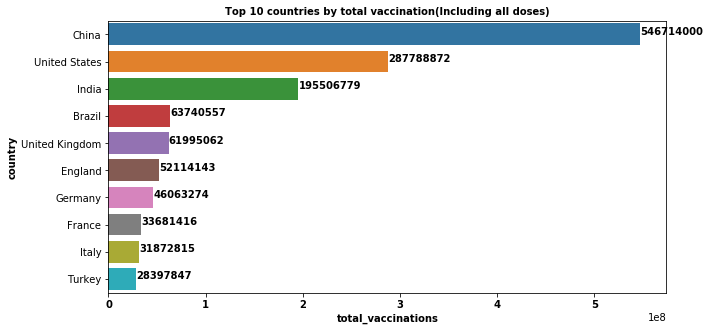

In [14]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
plt.title('Top 10 countries by total vaccination(Including all doses)', fontweight='bold', fontsize=10)
plt.ylabel('Country', fontweight='bold', fontsize=10, rotation=90)
plt.xlabel('Number of vaccinated', fontweight='bold', fontsize=10)
plt.xticks(fontweight='bold', fontsize=10)
sns.barplot(x='total_vaccinations', y='country', data=total_vaccination_by_country[ :10])

i = 0
for total in total_vaccination_by_country['total_vaccinations'][ :10]:
    ax.text(total + 20, i, str(int(total)) ,fontweight='bold', fontsize=10)
    i += 1


In [15]:
total_vaccination_per = vaccine_master_data.groupby('country')['people_vaccinated_per_hundred'].max().sort_values(ascending=False).reset_index()
total_vaccination_per

country  people_vaccinated_per_hundred
0                   Gibraltar                         115.73
1            Falkland Islands                          75.57
2                 Isle of Man                          72.06
3                  Seychelles                          71.31
4                       Malta                          70.30
..                        ...                            ...
206                     Syria                           0.01
207  Central African Republic                           0.01
208                   Algeria                            NaN
209                     China                            NaN
210              Saudi Arabia                            NaN

[211 rows x 2 columns]

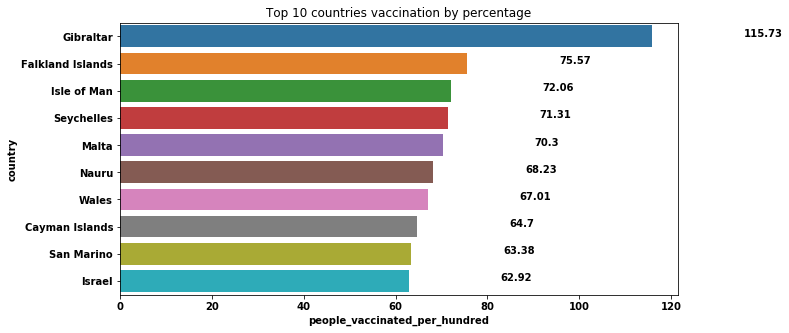

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.title('Top 10 countries vaccination by percentage')
plt.xlabel('People vaccinated (percentage)', fontweight='bold', fontsize=10)
plt.ylabel('Country', fontweight='bold', fontsize=10)
plt.xticks(fontweight='bold', fontsize=10)
plt.yticks(fontweight='bold', fontsize=10)
sns.barplot(x='people_vaccinated_per_hundred', y='country', data=total_vaccination_per[ :10])

i = 0
for per in total_vaccination_per['people_vaccinated_per_hundred'][ :10]:
    ax.text(per + 20, i , str(per), fontweight='bold', fontsize=10)
    i += 1

More percentage of people getting vaccinate in **Gibraltar**

## Bar Chart Race

In [17]:
data_vaccination = vaccine_master_data.pivot(index='date', columns='country', values='total_vaccinations').copy()
data_vaccination.isnull().sum()

country
Afghanistan          167
Albania               96
Algeria              172
Andorra              155
Angola               163
                    ... 
Wales                 40
Wallis and Futuna    165
Yemen                174
Zambia               147
Zimbabwe              82
Length: 211, dtype: int64

In [18]:
data_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 2020-12-02 to 2021-05-25
Columns: 211 entries, Afghanistan to Zimbabwe
dtypes: float64(211)
memory usage: 289.8+ KB


In [19]:
data_vaccination.iloc[0] = data_vaccination.iloc[0].fillna(0)
data_vaccination = data_vaccination.fillna(method='ffill')
data_vaccination

country     Afghanistan   Albania  Algeria  Andorra    Angola  Anguilla  \
date                                                                      
2020-12-02          0.0       0.0      0.0      0.0       0.0       0.0   
2020-12-03          0.0       0.0      0.0      0.0       0.0       0.0   
2020-12-04          0.0       0.0      0.0      0.0       0.0       0.0   
2020-12-05          0.0       0.0      0.0      0.0       0.0       0.0   
2020-12-06          0.0       0.0      0.0      0.0       0.0       0.0   
...                 ...       ...      ...      ...       ...       ...   
2021-05-21     547901.0  708846.0  75000.0  32317.0  757535.0   13235.0   
2021-05-22     547901.0  708846.0  75000.0  32317.0  757535.0   13235.0   
2021-05-23     547901.0  716616.0  75000.0  32317.0  757535.0   13235.0   
2021-05-24     573277.0  725135.0  75000.0  32317.0  757535.0   13235.0   
2021-05-25     573277.0  725135.0  75000.0  32317.0  757535.0   13235.0   

country     Antigua and Barbuda   Argentina  Armenia     Aruba  ...  \
date                                                            ...   
2020-12-02                  0.0         0.0      0.0       0.0  ...   
2020-12-03                  0.0         0.0      0.0       0.0  ...   
2020-12-04                  0.0         0.0      0.0       0.0  ...   
2020-12-05                  0.0         0.0      0.0       0.0  ...   
2020-12-06                  0.0         0.0      0.0       0.0  ...   
...                         ...         ...      ...       ...  ...   
2021-05-21              39519.0  10758782.0  19249.0  100003.0  ...   
2021-05-22              39519.0  10958659.0  19249.0  103395.0  ...   
2021-05-23              39519.0  11067550.0  19249.0  108471.0  ...   
2021-05-24              39519.0  11149468.0  19249.0  109756.0  ...   
2021-05-25              39519.0  11242209.0  19249.0  111377.0  ...   

country     United States    Uruguay  Uzbekistan  Venezuela    Vietnam  \
date                                                                     
2020-12-02            0.0        0.0         0.0        0.0        0.0   
2020-12-03            0.0        0.0         0.0        0.0        0.0   
2020-12-04            0.0        0.0         0.0        0.0        0.0   
2020-12-05            0.0        0.0         0.0        0.0        0.0   
2020-12-06            0.0        0.0         0.0        0.0        0.0   
...                   ...        ...         ...        ...        ...   
2021-05-21    281595351.0  2532852.0   1412312.0   316000.0  1011395.0   
2021-05-22    283941223.0  2547227.0   1412312.0   316000.0  1011395.0   
2021-05-23    285720586.0  2548835.0   1600504.0   316000.0  1011395.0   
2021-05-24    286890900.0  2590122.0   1600504.0   316000.0  1011395.0   
2021-05-25    287788872.0  2601019.0   1642744.0   316000.0  1011395.0   

country         Wales  Wallis and Futuna    Yemen    Zambia  Zimbabwe  
date                                                                   
2020-12-02        0.0                0.0      0.0       0.0       0.0  
2020-12-03        0.0                0.0      0.0       0.0       0.0  
2020-12-04        0.0                0.0      0.0       0.0       0.0  
2020-12-05        0.0                0.0      0.0       0.0       0.0  
2020-12-06        0.0                0.0      0.0       0.0       0.0  
...               ...                ...      ...       ...       ...  
2021-05-21  3065687.0             8175.0  18555.0  129941.0  887928.0  
2021-05-22  3092530.0             8175.0  18555.0  134832.0  904073.0  
2021-05-23  3102945.0             8175.0  18555.0  138201.0  911033.0  
2021-05-24  3124549.0             8175.0  18555.0  138201.0  914921.0  
2021-05-25  3150396.0             8283.0  18555.0  144085.0  914921.0  

[175 rows x 211 columns]

In [20]:
warnings.filterwarnings("ignore") ;
bcr.bar_chart_race(df=data_vaccination, sort='desc', steps_per_period=20, figsize=(5,3), n_bars=10, filter_column_colors=True,
                  title='Vaccination (Include all doses)')